In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [2]:
datafile = 'Sample Data/20201009-120035_loggerqc_Maud/20201009-120035_Raw_Trace_QC_Maud.csv'

In [3]:
df = pd.read_csv(datafile)

In [4]:
df.head()

Serial number    StartShotGpsUs                      StartTime  \
0     2300114612  1284731526466229  2020-09-21 13:51:48.466 +0000   
1     2300122065  1284731454986431  2020-09-21 13:50:36.986 +0000   
2     2300119796  1284731375267136  2020-09-21 13:49:17.267 +0000   
3     2300118159  1284731298531644  2020-09-21 13:48:00.531 +0000   
4     2300114691  1284731213030391  2020-09-21 13:46:35.030 +0000   

   LengthShotUs  Line  Point  OverflowCount  DCOffset  SpikeRatio  TotalGaps  \
0     551040000   102   1041          10093 -0.012656    4.749676          0   
1     623616000   102   1040          10142  0.086907    5.083025          0   
2     701568000   102   1039           5865  0.022485    6.944045          0   
3     779520000   102   1038           5829  0.059258    6.968041          0   
4     865536000   102   1037           5542  0.037843    7.332475          0   

   ...  BatteryVoltage  NoGNSSEvents  Lat  Lon  HeightM  HorAcc  VerAcc  \
0  ...          4028.0             0  0.0  0.0      0.0     0.0     0.0   
1  ...          3994.0             0  0.0  0.0      0.0     0.0     0.0   
2  ...          4030.0             0  0.0  0.0      0.0     0.0     0.0   
3  ...          4022.0             0  0.0  0.0      0.0     0.0     0.0   
4  ...          4033.0             0  0.0  0.0      0.0     0.0     0.0   

         posTimeUs                        posTime  Unnamed: 28  
0 -315964819000000  1969-12-31 23:59:23.000 +0000          NaN  
1 -315964819000000  1969-12-31 23:59:23.000 +0000          NaN  
2 -315964819000000  1969-12-31 23:59:23.000 +0000          NaN  
3 -315964819000000  1969-12-31 23:59:23.000 +0000          NaN  
4 -315964819000000  1969-12-31 23:59:23.000 +0000          NaN  

[5 rows x 29 columns]

In [5]:
lines = []
for i,line in enumerate(np.unique(df['Line'])):
    lines.append(df.loc[df['Line']==line])

In [22]:
lines[1].StartTime

398      2020-09-13 19:24:11.868 +0000
401      2020-09-13 19:22:57.708 +0000
403      2020-09-13 19:22:00.700 +0000
405      2020-09-13 19:20:47.120 +0000
408      2020-09-13 19:19:34.637 +0000
                     ...              
29514    2020-09-29 15:59:59.750 +0000
29515    2020-09-29 15:59:59.750 +0000
29528    2020-09-29 14:59:59.752 +0000
29554    2020-09-29 14:59:59.750 +0000
29557    2020-09-29 15:59:59.751 +0000
Name: StartTime, Length: 3818, dtype: object

In [88]:
def get_point_data_from_line(df,key):
    maxlen = 0
    
    sorted_unique_pts = np.sort(np.unique(df['Point']))

    for p in sorted_unique_pts:
        point = df.loc[df['Point']==p]
        if len(point) > maxlen:
            maxlen = len(point)
    
    point_data = np.zeros((len(sorted_unique_pts),maxlen))

    for i,p in enumerate(sorted_unique_pts):
        point = df.loc[df['Point']==p]
        point_data[i,:len(point)] = point[key].to_numpy()

    return point_data

In [176]:
p_data = get_point_data_from_line(lines[2],'RMS')
p_data.shape

(47, 762)

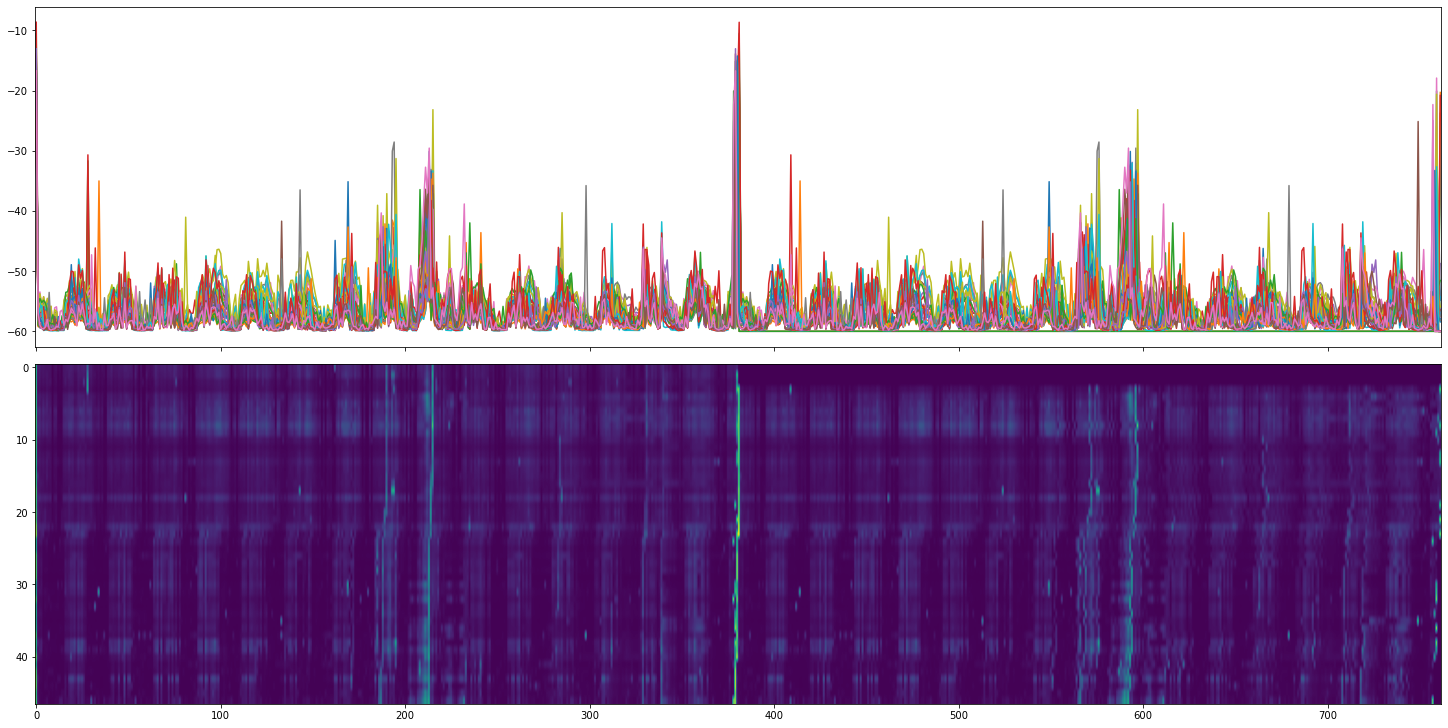

In [178]:
p_data_db = 20*np.log10(1e-3+p_data)

f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10),
        constrained_layout=True)

im1 = ax1.plot(p_data_db.T)
im2 = plt.imshow(p_data_db,aspect='auto')

plt.show()

In [6]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [7]:
df.to_sql('stryde_data', con=engine)

In [85]:
a = np.load('Sample Data/Stryde_input_data_csg1.npy')
a /= np.std(a,0)

In [86]:
plt.figure(figsize=(10,20))
plt.imshow(a,aspect='auto',clim = [-1,1])
plt.show()